<a href="https://colab.research.google.com/github/TheMisba7/TheStage/blob/main/CouldBeBetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import tensorflow as tf
import numpy as np

base_dir= "/gdrive/MyDrive/PLANTS"

IMAGE_SIZE=96
BATCH_SIZE=32


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMAGE_SIZE, 
                                                              IMAGE_SIZE,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [4]:
#pre=processing
batch_size = 96
img_height = 96
img_width = 96


train_data = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height,img_width),
  batch_size=batch_size)

class_names = val_data.class_names

Found 1250 files belonging to 24 classes.
Using 1000 files for training.
Found 1250 files belonging to 24 classes.
Using 250 files for validation.


In [5]:
print(class_names)

['Carum carvi L', 'Cicer-arietinum', 'Coffea-arabica', 'Eriobotrya-japonica', 'Ferula communis L', 'Myrtus-communis', 'Phillyrea-angustifolia', 'Pistacia lentiscus L', 'Populus nigra', 'Prunus-amygdalus', 'Prunus-armenica', 'Rosmarinusofficinalis', 'Salix-alba', 'cleomé arabica', 'linum usitatissimum', 'pergularia tamantosa', 'periploca angustifolia', 'rubia-peregrina', 'الزراوند قليل العروق', 'برزطم', 'برواك', 'زراوند', 'سكوم', 'هليون']
24


In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(96,96,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64,activation='relu'))
cnn.add(tf.keras.layers.Dense(164,activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [6]:
#batch-size = 100 epoch = 50 / better but overfitting
model = tf.keras.Sequential([
     data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),                     
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(164, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'],)


In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                  

In [18]:
model.load_weights('/gdrive/MyDrive/my_model_weights.h5')

In [19]:
model.fit(train_data,epochs=80,validation_data=val_data)

Epoch 1/80
11/11 [==============================] - 17s 1s/step - loss: 0.8339 - accuracy: 0.7530 - val_loss: 3.1456 - val_accuracy: 0.4120
Epoch 2/80
11/11 [==============================] - 16s 1s/step - loss: 0.8249 - accuracy: 0.7460 - val_loss: 3.1840 - val_accuracy: 0.4080
Epoch 3/80
11/11 [==============================] - 16s 1s/step - loss: 0.7937 - accuracy: 0.7590 - val_loss: 3.3954 - val_accuracy: 0.3760
Epoch 4/80
11/11 [==============================] - 16s 1s/step - loss: 0.7993 - accuracy: 0.7580 - val_loss: 3.2026 - val_accuracy: 0.3920
Epoch 5/80
11/11 [==============================] - 16s 1s/step - loss: 0.7959 - accuracy: 0.7470 - val_loss: 3.3055 - val_accuracy: 0.4000
Epoch 6/80
11/11 [==============================] - 16s 1s/step - loss: 0.7276 - accuracy: 0.7640 - val_loss: 3.3319 - val_accuracy: 0.4000
Epoch 7/80
11/11 [==============================] - 16s 1s/step - loss: 0.7567 - accuracy: 0.7610 - val_loss: 3.5101 - val_accuracy: 0.3920
Epoch 8/80
11/11 [==

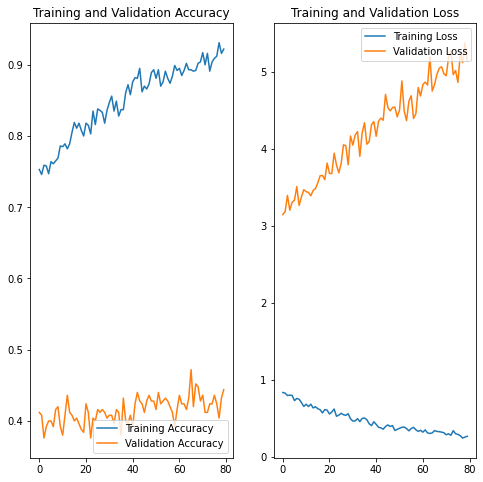

In [21]:
history = model.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 80
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save_weights('/gdrive/MyDrive/my_model_weights.h5')

In [13]:
image = "/gdrive/MyDrive/PLANTS/Salix-alba/46d1d98e7960cd198eb9973547ea6f35acc954ff.jpeg"
img = tf.keras.utils.load_img(image, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence."
                        .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to هليون with a 0.71 percent confidence.
